### Predicting Heart Failure Mortality

Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worlwide.
Heart failure is a common event caused by CVDs and this dataset contains 12 features that can be used to predict mortality by heart failure.

Most cardiovascular diseases can be prevented by addressing behavioural risk factors such as tobacco use, unhealthy diet and obesity, physical inactivity and harmful use of alcohol using population-wide strategies.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.

https://www.kaggle.com/datasets/whenamancodes/heart-failure-clinical-records?resource=download

## Acquire

### 1. Import Libraries

In [3]:
%matplotlib inline

In [63]:
import tensorflow as tf

In [29]:
import pandas as pd # PANel DAta
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn import svm  
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix


# ignore ConvergenceWarnings
from  warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)


In [6]:
#read data in via Pandas
df = pd.read_csv('Heart Failure Clinical Records.csv')
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


## Prepare

### 2. Initial data exploration

In [4]:
# Structure
df.shape

(299, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [6]:
# Assign Numberical Values to num
num = df[ 
            ['age','creatinine_phosphokinase','ejection_fraction','platelets',
              'serum_creatinine','serum_sodium','time'
            ]
       ].copy()

In [7]:
# Assign Categorical variables to cat
cat =df[
            ['anaemia','diabetes','high_blood_pressure',
             'sex','smoking','DEATH_EVENT'
            ]
        ].copy()

In [8]:
# Convert from NUM to Char format
cat = cat.astype('category')

In [9]:
# Categorical to list
cat_list = cat.columns[:].tolist()
cat_list

['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking', 'DEATH_EVENT']

In [10]:
num.describe(percentiles=[])

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
count,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000
mean,60.833893,581.839465,38.083612,263358.029264,1.39388,136.625418,130.260870
std,11.894809,970.287881,11.834841,97804.236869,1.03451,4.412477,77.614208
min,40.000000,23.000000,14.000000,25100.000000,0.50000,113.000000,4.000000
50%,60.000000,250.000000,38.000000,262000.000000,1.10000,137.000000,115.000000
max,95.000000,7861.000000,80.000000,850000.000000,9.40000,148.000000,285.000000


### 3. Visualization

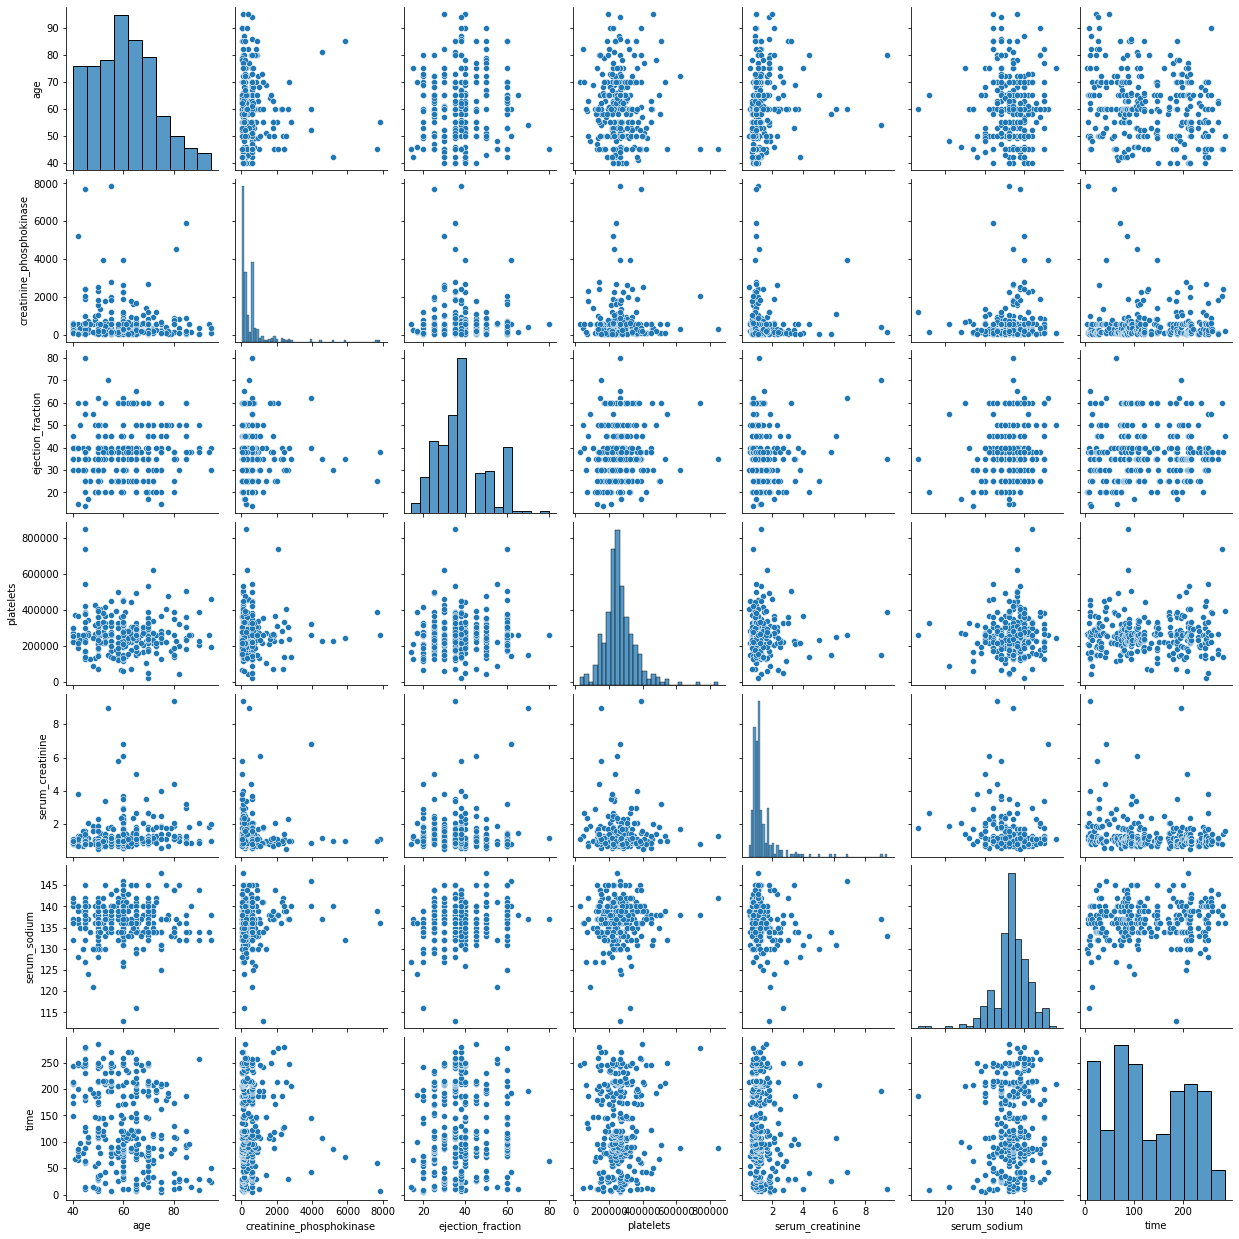

In [11]:
sns.pairplot(num)

In [12]:
cat.describe()

,anaemia,diabetes,high_blood_pressure,sex,smoking,DEATH_EVENT
count,299,299,299,299,299,299
unique,2,2,2,2,2,2
top,0,0,0,1,0,0
freq,170,174,194,194,203,203


### Death Event Vs Categorical Features

In [13]:
sns.set_theme(font_scale=1.3)
sns.set_style('whitegrid')

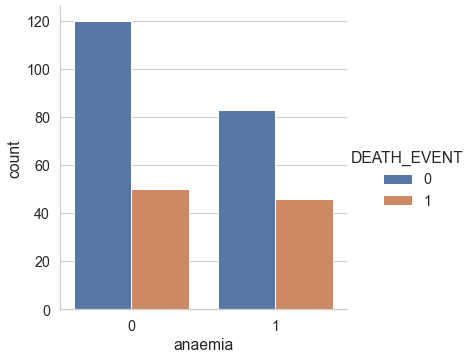

In [14]:
sns.catplot(data=cat, 
             x='anaemia', 
            hue='DEATH_EVENT', 
            kind='count')

**There appears to be proportionally more death events for  
patients that had anemia than those that did not.**

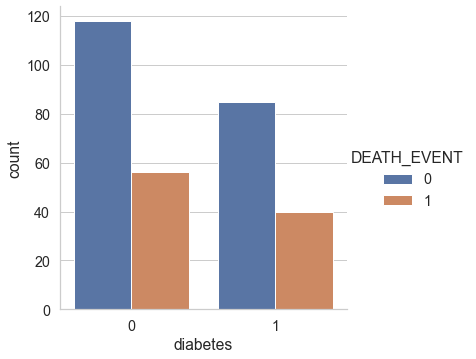

In [15]:
sns.catplot(data=cat, 
             x='diabetes', 
            hue='DEATH_EVENT', 
            kind='count')

**Diabetes appears appears to be slightly proportional more death  
events for patients that had diabetes than those that did not.**

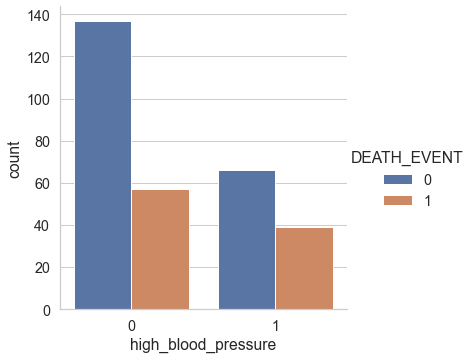

In [16]:
sns.catplot(data=cat, 
             x='high_blood_pressure', 
            hue='DEATH_EVENT', 
            kind='count')

**High Blood Pressure appears appears to be significantly  
proportional more death events for patients that had High  
Blood Pressure than those that did not.**

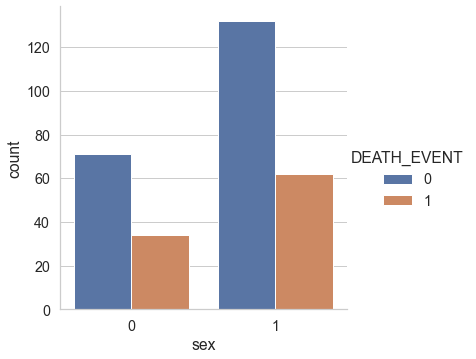

In [17]:
sns.catplot(data=cat, 
             x='sex', 
            hue='DEATH_EVENT', 
            kind='count')

**There are more males than females in the study, but both  
appear to be proportionally the same regarding Death Event.**

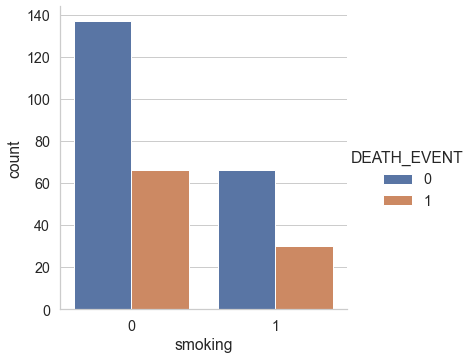

In [18]:
sns.catplot(data=cat, 
             x='smoking', 
            hue='DEATH_EVENT', 
            kind='count')

**Visually there appears to be no difference between  
smoking and the death event.**

### Death Event Box plots of Continuous Features

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='age'>

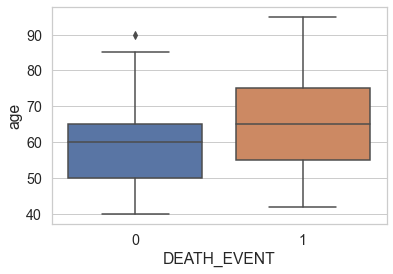

In [19]:
sns.boxplot(x=df['DEATH_EVENT'], y=df['age'])

**Persons of higher age had more Death Events**

In [20]:
# Remove extreme values to compare boxplots
filtered = df[ (df['creatinine_phosphokinase']<1500)].copy()

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='creatinine_phosphokinase'>

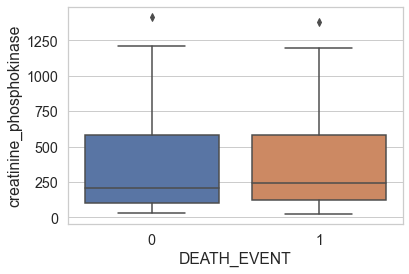

In [21]:
sns.boxplot(x=filtered['DEATH_EVENT'], y=filtered['creatinine_phosphokinase'])

**Creatinine Phos. has a slightly higher death event median  
compared to non death-events**

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='ejection_fraction'>

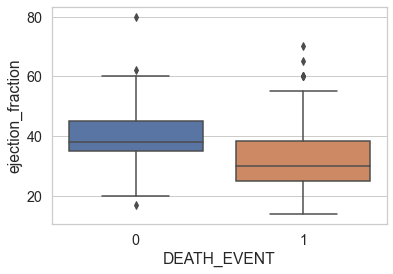

In [22]:
sns.boxplot(x=filtered['DEATH_EVENT'], y=filtered['ejection_fraction'])

**Patients that had higher ejection fraction numbers had  
lower death events**

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='platelets'>

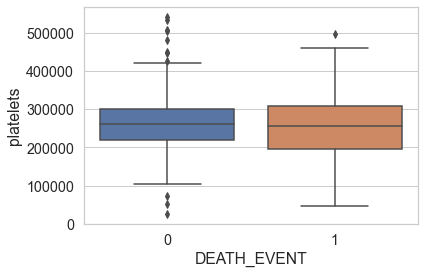

In [23]:
# Remove extreme values to compare boxplots
filtered1 = df[ (df['platelets']<600000)].copy() 
sns.boxplot(x=filtered1['DEATH_EVENT'], y=filtered1['platelets'])

**There visually appears to be little difference between   
number of plateletes and death event**

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='serum_creatinine'>

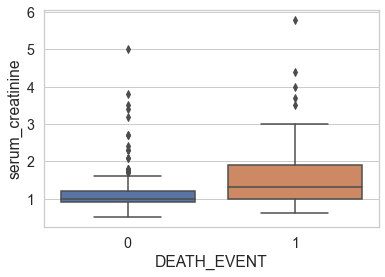

In [24]:
filtered2 = df[ (df['serum_creatinine']<6)].copy() 
sns.boxplot(x=filtered2['DEATH_EVENT'], y=filtered2['serum_creatinine'])

**There appears to be a significant difference between  
Serum Creatinine and Death events.The patients that have  
lower numbers also have lower death events**

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='serum_sodium'>

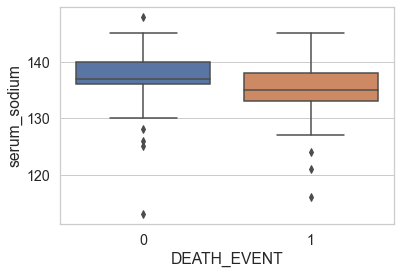

In [25]:
sns.boxplot(x=filtered2['DEATH_EVENT'], y=filtered2['serum_sodium'])

**The visualization shows that a patient with lower serum  
sodium numbers had more death events**

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='time'>

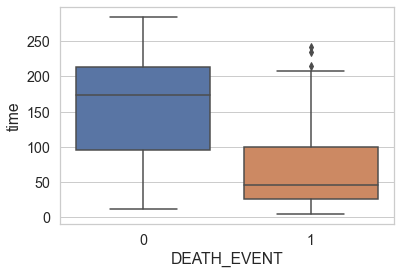

In [26]:
sns.boxplot(x=filtered2['DEATH_EVENT'], y=filtered2['time'])

**The plot shows that the greater the time between follow  
ups, the less the death events**

## Analyze

### **Split data for training and testing**

In [23]:
X = df.drop('DEATH_EVENT',axis=1)
y = df['DEATH_EVENT']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((239, 12), (60, 12), (239,), (60,))

### **Scale values**

In [26]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [27]:
# Various Models to find best fit
models = [
    { "estimater": KNeighborsClassifier(),
      "params": {
          "n_neighbors": [25,30,35,45],
          "weights": ['uniform','distance'],
          "leaf_size": [25,30,35],
          "p": [1,2,3],
        }
    },
    { "estimater": DecisionTreeClassifier(),
      "params": {
          "criterion": ['gini','entropy'],
          "splitter": ['best','random'],
          "max_depth": [None,90,95,100],
          "max_features": [None, "auto","sqrt","log2"],
          "random_state": [42]
      }
    },
    { "estimater": MultinomialNB(),
      "params": {
          "fit_prior": [True, False]    
      }
    },
    { "estimater": LinearSVC(),
      "params": {
          "loss": ['hinge','squared_hinge'],
          "multi_class": ['ovr', 'crammer_singer'],
          "fit_intercept": [True, False],
          "random_state": [42],
          "max_iter": [900, 1000, 1100]
      }
    },
    { "estimater": svm.SVC(),
      "params": {
          'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']
      }
    },
    { "estimater": RandomForestClassifier(),
      "params": {
      "criterion": ['gini','entropy'],
      "bootstrap": [True, False],
      "max_depth": [85,90,95,100],
      "max_features": ['sqrt','log2'],
      "n_estimators": [60, 80, 90],
      "random_state": [42]
      }
    },
    { "estimater": SGDClassifier(),
      "params": {
          "loss": ['hinge','log','perceptron'], 
          "penalty": ['l2', 'l1'], 
          "alpha": [0.0001, 0.0003, 0.0010],
          "early_stopping": [True],
          "max_iter": [1000, 1500],
          "random_state": [42]
      }
    }
]


In [14]:
type(models)

list

In [1]:
models

NameError: name 'models' is not defined

### **Loop through 7 Classifier Models**

In [28]:
column_names = ["KNeighbors", "DecisionTree", "MultiNB", "SVC", "SVM", "RFC", "SGDClassifier"]
entries = []
highest_acc = 0
best_model = None

for model in models:
  print(model["estimater"])

  # Create model
  clf = model["estimater"]
  # Instantiate the grid search model
  grid_search = GridSearchCV(estimator = clf, param_grid = model["params"], 
                            cv = 10)
  
  # Fit the model
  grid_search.fit(X_train_scaled, y_train);

  # Make a prediction on the test split to find model accuracy
  predicted = grid_search.predict(X_test_scaled)
  acc = accuracy_score(predicted, y_test)
  entries.append(acc)

  print(grid_search.best_params_)

  # If model have the highest accuracy, it's out best model
  if acc > highest_acc:
    highest_acc = acc
    best_model = grid_search


KNeighborsClassifier()
{'leaf_size': 25, 'n_neighbors': 25, 'p': 2, 'weights': 'distance'}
DecisionTreeClassifier()
{'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'random_state': 42, 'splitter': 'random'}
MultinomialNB()
{'fit_prior': False}
LinearSVC()
{'fit_intercept': True, 'loss': 'squared_hinge', 'max_iter': 900, 'multi_class': 'ovr', 'random_state': 42}
SVC()
{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
RandomForestClassifier()
{'bootstrap': True, 'criterion': 'gini', 'max_depth': 85, 'max_features': 'sqrt', 'n_estimators': 60, 'random_state': 42}
SGDClassifier()
{'alpha': 0.0003, 'early_stopping': True, 'loss': 'hinge', 'max_iter': 1000, 'penalty': 'l2', 'random_state': 42}


### **Plot Model Performance**

       Estimater  Accuracy
0     KNeighbors  0.600000
1   DecisionTree  0.700000
2        MultiNB  0.700000
3            SVC  0.816667
4            SVM  0.833333
5            RFC  0.750000
6  SGDClassifier  0.733333


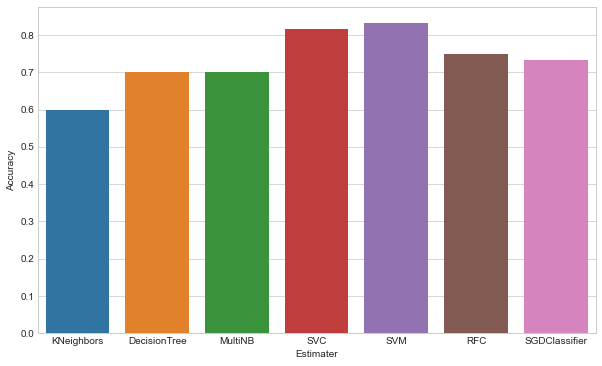

In [29]:
plt.style.use('seaborn-whitegrid')

df = pd.DataFrame({"Estimater": column_names, 
                   "Accuracy": entries
                  })

plt.figure(figsize=(10, 6))
sns.barplot(x='Estimater', y='Accuracy', data=df)
print(df)


## Tensor NN

In [18]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.callbacks import EarlyStopping

### Train/Test Split

In [8]:
X = df.drop('DEATH_EVENT',axis=1).values
y = df['DEATH_EVENT'].values

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)

### Scale Data

In [12]:
scaler = MinMaxScaler()

In [13]:
scaler.fit(X_train)

MinMaxScaler()

In [16]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_train.shape

(224, 12)

### Build Model

In [69]:
model = Sequential()

model.add(Dense(units=12,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=6,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=3,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=2,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

### Train Model

In [70]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [71]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=100,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/100
7/7 [==============================] - 1s 34ms/step - loss: 0.6865 - accuracy: 0.7098 - val_loss: 0.6752 - val_accuracy: 0.5867
Epoch 2/100
7/7 [==============================] - 0s 7ms/step - loss: 0.7200 - accuracy: 0.7098 - val_loss: 0.6756 - val_accuracy: 0.5867
Epoch 3/100
7/7 [==============================] - 0s 8ms/step - loss: 0.7256 - accuracy: 0.7098 - val_loss: 0.6758 - val_accuracy: 0.5867
Epoch 4/100
7/7 [==============================] - 0s 7ms/step - loss: 0.7498 - accuracy: 0.7098 - val_loss: 0.6762 - val_accuracy: 0.5867
Epoch 5/100
7/7 [==============================] - 0s 8ms/step - loss: 0.7115 - accuracy: 0.7098 - val_loss: 0.6766 - val_accuracy: 0.5867
Epoch 6/100
7/7 [==============================] - 0s 15ms/step - loss: 0.6956 - accuracy: 0.7098 - val_loss: 0.6767 - val_accuracy: 0.5867
Epoch 7/100
7/7 [==============================] - 0s 7ms/step - loss: 0.6759 - accuracy: 0.7098 - val_loss: 0.6769 - val_accuracy: 0.5867
Epoch 8/100
7/7 [========

<AxesSubplot:>

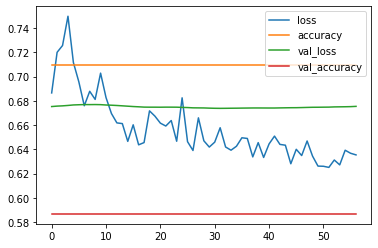

In [72]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

### Model Performance

In [73]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 12)                156       
                                                                 
 dropout_9 (Dropout)         (None, 12)                0         
                                                                 
 dense_16 (Dense)            (None, 6)                 78        
                                                                 
 dropout_10 (Dropout)        (None, 6)                 0         
                                                                 
 dense_17 (Dense)            (None, 3)                 21        
                                                                 
 dropout_11 (Dropout)        (None, 3)                 0         
                                                                 
 dense_18 (Dense)            (None, 2)                

In [36]:
predict_x=model.predict(X_test) 
#classes_x=np.argmax(predict_x,axis=1)
#print(classification_report(y_test,X_test))

3/3 [==============================] - 0s 6ms/step


In [52]:
model.evaluate(X_test,y_test,verbose=0)

0.6817428469657898

The model is predicting at 0.68. 